In [1]:
cd ..


/playpen-raid1/tgreer/FeatureMapICON


In [2]:
import fmapicon.models
import fmapicon.utils
import fmapicon.threaded_video_dataset
import torch
import numpy as np
import matplotlib.pyplot as plt

In [23]:
model = fmapicon.models.tallUNet64()
#model.load_state_dict(torch.load("results/shallow_net2/network00031.trch"))
#model.load_state_dict(torch.load("results/confirm_nothing_broken/network00096.trch"))
#model.load_state_dict(torch.load("results/pixelwise_normalize4/network00054.trch"))
#model.load_state_dict(torch.load("results/pixelwise_normalize_lrschedule/network00008.trch"))
#model.load_state_dict(torch.load("results/batchnorm_everw_fastrate/network00059.trch"))
model.load_state_dict(torch.load("results/rolling_augmentation_2/network00053.trch"))
model.cuda()
model.eval()

UNet2(
  (downConvs): ModuleList(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (4): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  )
  (upConvs): ModuleList(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ConvTranspose2d(192, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (2): ConvTranspose2d(384, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  )
  (residues): ModuleList(
    (0): Residual(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [24]:
ds = fmapicon.threaded_video_dataset.threadedProvide()

In [25]:
batch = next(ds)

In [26]:
q = batch[:] / 255

In [27]:
A, B = q[:, :3], q[:, 3:]

In [28]:
f_A = model(A.cuda()).cpu().detach()

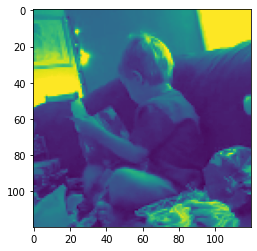

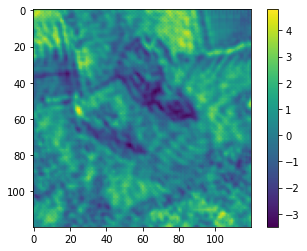

In [32]:
C = 37
plt.imshow(A[1, 0])
plt.show()
#plt.imshow(torch.mean(f_A[:, C], axis=0))
#plt.colorbar()
#plt.show()
plt.imshow(f_A[1, C])
plt.colorbar()
plt.show()


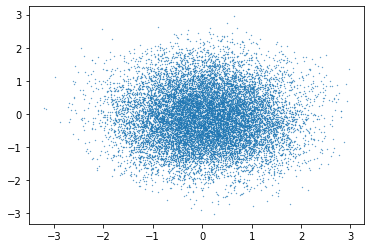

In [22]:
plt.scatter(f_A[54, 31].flatten(), f_A[1, 48].flatten(), s=.1)

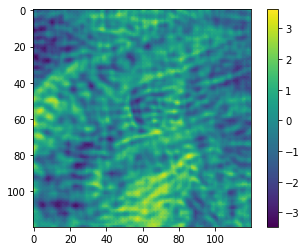

NameError: name 'fe_A' is not defined

In [11]:
plt.imshow(f_A[0, 19])
plt.colorbar()
plt.show()
plt.imshow(fe_A[0, 19])
plt.colorbar()
plt.show()
plt.imshow((f_A - fe_A)[0, 19])
plt.colorbar()

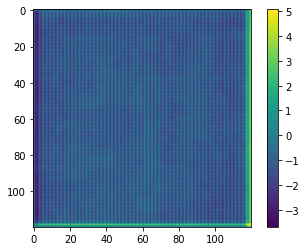

In [33]:
plt.imshow(model.pix_norm.mean[0][37].cpu())
plt.colorbar()